# **inspyred**: algoritmos bioinspirados en Python

*Técnicas de Soft Computing para Aprendizaje y Optimización. Redes Neuronales y Metaheurísticas, Programación Evolutiva y Bioinspirada*

Curso 2020/2021

* Andrea Morales Garzón <andreamgmg@correo.ugr.es>
* Antonio Manjavacas Lucas <manjavacas@correo.ugr.es>

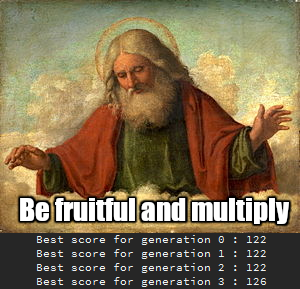

## Introducción

En este trabajo se llevará a cabo una introducción a [inspyred](https://pypi.org/project/inspyred/). Se trata de una librería de código abierto orientada al desarrollo de algoritmos bioinspirados en Python. Incluye algoritmos evolutivos, basados inteligencia de enjambre e inmunocomputación. La librería proporciona versiones canónicas de muchos de estos algoritmos, así como *benchmarks* orientados a probar su funcionamiento.

## Problema a resolver

Para conocer en detalle *inspyred*, tomaremos como ejemplo el [problema de la mochila ](https://es.wikipedia.org/wiki/Problema_de_la_mochila), el cual trataremos de resolver empleando los algoritmos bioinspirados ofrecidos por la librería.

## Preparación

Comenzamos instalando y cargando las librerías necesarias. 

In [ ]:
!pip install inspyred

import inspyred
import random
from time import time
import pylab

random.seed(42)

     |████████████████████████████████| 92kB 3.9MB/s 


A continuación, preparamos nuestra lista de ítems. En este caso, cada ítem queda representado por una tupla `(x,y)` donde el primer valor representa el *peso* y el segundo, el *valor* del ítem:

In [ ]:
items = [(1,2), (2,4), (3,7), (7,9), (11,13), (13,9), (17,11)]

Con nuestro conjunto de ítems definido, instanciamos el problema. La capacidad de la mochila se ha fijado a 15, permitiendo introducir un mismo elemento más de una vez (`duplicates=True`). Al tratarse de un problema clásico, éste está disponible dentro de los *benchmarks* ofrecidos por *inspyred*:

In [ ]:
problem_no_duplicates = inspyred.benchmarks.Knapsack(15, items, duplicates=False)
problem_duplicates = inspyred.benchmarks.Knapsack(15, items, duplicates=True)

Posteriormente, procederemos a resolver el problema mediante diferentes algoritmos bioinspirados.

## 1. Algoritmos genéticos

Los **algoritmos genéticos** son una familia de algoritmos bioinspirados que tratan de replicar el proceso de evolución natural propuesto por Darwin. Se basan en hacer evolucionar poblaciones de soluciones hacia valores óptimos del problema, haciendo uso de los siguientes elementos:

* Una **población** de **individuos** (soluciones).
* Una función de **fitness** que evalúa el valor de los individuos.
* Una función de **cruce** que genera descendientes a partir de la combinación de diferentes individuos.

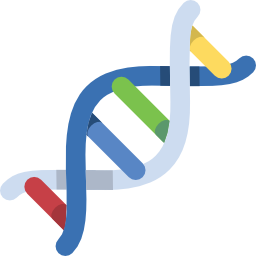

La estructura del algoritmo genético es la siguiente:

1. Generar la población inicial de individuos de forma arbitraria.
2. Evaluar a los individuos mediante la función de *fitness*.
3. Seleccionar los mejores individiuos.
4. Cruzar los individuos seleccionados mediante la función de cruce, dando lugar a una nueva generación.
5. Finalmente, pueden producirse mutaciones sobre ciertos individuos de forma aleatoria.

La ejecución del algoritmo finalizará al alcanzar un número de generaciones concreto o tras cumplirse una condición de parada.

Conocidos los fundamentos de este tipo de algoritmos, comencemos instanciando nuestro problema con **inspyred**:

In [ ]:
ea = inspyred.ec.EvolutionaryComputation(random.Random())

A continuación, ajustaremos los siguientes parámetros:

* *selector*: el operador de selección.
* *variator*: operadores de cruce y mutación (en este caso, uniforme y gaussiano).
* *replacer*: operador de reemplazo.
* *terminator*: el operador de terminación empleado.

*Existen múltiples operadores que pueden ser fijados por el usuario: migrator, archiver, observer, etc. Más información [aquí](https://pythonhosted.org/inspyred/reference.html).*

In [ ]:
ea.selector = inspyred.ec.selectors.tournament_selection
ea.variator = [inspyred.ec.variators.uniform_crossover, 
                inspyred.ec.variators.gaussian_mutation]
ea.replacer = inspyred.ec.replacers.steady_state_replacement
ea.terminator = inspyred.ec.terminators.evaluation_termination

Finalmente, instanciamos y ejecutamos nuestro algoritmo:

In [ ]:
def GA(problem):
  final_pop = ea.evolve(generator=problem.generator, 
                        evaluator=problem.evaluator, 
                        bounder=problem.bounder,
                        maximize=problem.maximize, 
                        pop_size=100, 
                        max_evaluations=30000,
                        tournament_size=5,
                        num_selected=2)
  best = max(final_pop)
  print('Best Solution: {0}: {1}'.format(str(best.candidate),best.fitness))
 
GA(problem_no_duplicates)
GA(problem_duplicates)                                               

Best Solution: [1, 1, 1, 1, 0, 0, 0]: 22
Best Solution: [3, 0, 4, 0, 0, 0, 0]: 34


Así, habremos resuelto el problema empleando la clase genérica `EvolutionaryComputation`, la cual encapsula cualquier tipo de algoritmo evolutivo. 

No obstante, si pretendemos emplear un algoritmo genético canónico, podemos utilizar la clase `GA` directamente:

In [ ]:
def GA_canonic(problem):
  ea = inspyred.ec.GA(random.Random())
  ea.terminator = inspyred.ec.terminators.evaluation_termination
  final_pop = ea.evolve(generator=problem.generator,
                        evaluator=problem.evaluator,
                        pop_size=100,
                        maximize=problem.maximize,
                        bounder=problem.bounder,
                        max_evaluations=30000, 
                        num_elites=1)

  best = max(final_pop)
  print('Best Solution: \n{0}'.format(str(best)))

GA_canonic(problem_no_duplicates)
GA_canonic(problem_duplicates)

Best Solution: 
[1, 1, 1, 1, 0, 0, 0] : 22
Best Solution: 
[7, 1, 2, 0, 0, 0, 0] : 32


## 2. Estrategias evolutivas

Las **estrategias evolutivas** son una familia de algoritmos evolutivos diferenciados de los algoritmos genéticos por la forma en que se produce la selección de invididuos (determinista) y su mutación:

* El operador principal es el de mutación, basado en una [distribución normal multivariante](https://pythonhosted.org/inspyred/reference.html).
* La selección en este tipo de algoritmos es determinada en base a la aptitud.

Además, a diferencia de los algoritmos genéticos, la solución es codificada directamente por sus valores reales [\[1\]](http://www.scielo.org.co/pdf/rium/v10n18/v10n18a13.pdf).


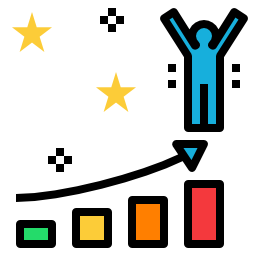

Veamos como aplicar estrategias evolutivas en **inspyred**:

In [ ]:
def ES(problem):
  ea = inspyred.ec.ES(random.Random())
  ea.terminator = [inspyred.ec.terminators.evaluation_termination, 
                    inspyred.ec.terminators.diversity_termination]
  final_pop = ea.evolve(generator=problem.generator, 
                        evaluator=problem.evaluator, 
                        pop_size=100, 
                        bounder=problem.bounder,
                        maximize=problem.maximize,
                        max_evaluations=30000)

  best = max(final_pop)
  print('Best Solution: \n{0}'.format(str(best)))   

ES(problem_no_duplicates)
ES(problem_duplicates)

Best Solution: 
[1, 1, 1, 1, 0, 0, 0, 0.00042546347678468633, 9.317043858239431e-05, 0.008599621710192082, 0.006024539450668274, 0.0029034720956807713, 2.7131103422911092e-05, 0.004148222937779213] : 22
Best Solution: 
[3, 0, 4, 0, 0, 0, 0, 0.018309203211449483, 0.00024024286565623554, 0.0011303671749057652, 6.4802414564991e-05, 2.1938544040870072e-05, 4.283284682557547e-05, 0.00041246305977518606] : 34


## 3. Enfriamiento simulado

El **enfriamiento simulado** es un algoritmo de búsqueda local orientado a evitar caer en óptimos locales. Para ello, se permite la transición hacia soluciones peores de forma controlada. Este control reside en establecer una probabilidad de transición decreciente a lo largo del tiempo, de forma semejante al enfriamiento de un material siguiendo un equilibrio termal.

Con el paso del tiempo, disminuirá la probabilidad de aceptar soluciones peores a la actual. Así, esta técnica permite una mayor la exploración/diversificación en los primeros episodios de la ejecución, y un mayor énfasis en la explotación/intensificación al final.

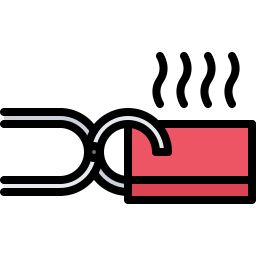

La probabilidad de elegir una solución vecina peor ($A$) se hace con una probabilidad dependiente de la "temperatura" (tiempo) y de la valoración de la solución actual ($A'$) y la del vecino ($A$), según la fórmula:

> $p(A) = e^{\frac{valor(A)-valor(A')}{t}}$

Si $valor(A')$ está cerca de $valor(A)$, habrá una mayor probabilidad de que la transición tenga lugar. Por otro lado, si el tiempo restante del algoritmo es alto, el exponente será cercano a cero, así que la probabilidad será cercana a $1$. Finalmente, cuando $t \rightarrow 0$, el exponente tiende a $-\infty$, y la probabilidad se acerca a $0$.

La implementación de este algoritmo en **inspyred** es la siguiente:

In [ ]:
def SA(problem):
  ea = inspyred.ec.SA(random.Random())
  ea.terminator = inspyred.ec.terminators.evaluation_termination
  final_pop = ea.evolve(evaluator=problem.evaluator, 
                        generator=problem.generator, 
                        maximize=problem.maximize,
                        bounder=problem.bounder,
                        max_evaluations=30000)
      
  best = max(final_pop)
  print('Best Solution: \n{0}'.format(str(best)))

SA(problem_no_duplicates)
SA(problem_duplicates)

Best Solution: 
[1, 1, 1, 1, 0, 0, 0] : 22
Best Solution: 
[10, 1, 1, 0, 0, 0, 0] : 31


## 4. Evolución diferencial

El algoritmo de **evolución diferencial** (ED) es un método de optimización evolutivo caracterizado por el uso de vectores de prueba que compiten con los individuos de la población actual buscando su supervivencia.



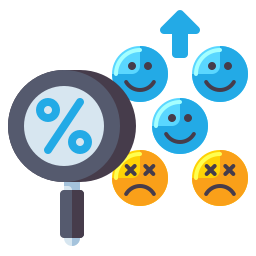

La principal novedad incorporada por ED es la forma en que se generan vectores solución. Cada vector $x_i$ (*target*) genera un descendiente $u_i$ (*trial*) mediante el uso de un vector mutante $v_i$, obtenido tal que:

> $v_i=x_{r0} + F(x_{r1} - x_{r2}$)

donde $x_{r0}$ (vector base), $x_{r1}$ y $x_{r2}$ (vectores diferencia) son vectores solución obtenidos aleatoriamente a partir de la población actual y $F > 0$ es una factor de escala arbitrario.

Una vez generado $v_i$, se combina con $x_i$ para generar $u_i$ empleando el siguiente operador de cruce:

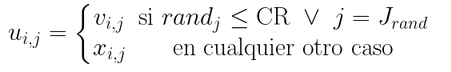

siendo $CR \in [0,1]$ la similaridad entre $u_i$ y $v_i$ y $J_{rand} \in [1,n]$ un número entero que evita que $u_i$ sea una copia de $x_i$.

Finalmente, la siguiente función objetivo es empleada para elegir el mejor vector entre $x_i$ y $u_i$ y proseguir con la siguiente generación:

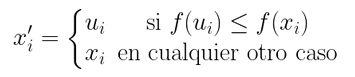

Veamos ahora su implementación en **inspyred**:

In [ ]:
def DE(problem):
  ea = inspyred.ec.DEA(random.Random())
  ea.terminator = inspyred.ec.terminators.evaluation_termination
  final_pop = ea.evolve(generator=problem.generator, 
                        evaluator=problem.evaluator, 
                        pop_size=100, 
                        bounder=problem.bounder,
                        maximize=problem.maximize,
                        max_evaluations=30000)

  best = max(final_pop) 
  print('Best Solution: \n{0}'.format(str(best)))

DE(problem_no_duplicates)
DE(problem_duplicates)

Best Solution: 
[1, 1, 1, 1, 0, 0, 0] : 22
Best Solution: 
[0, 0, 5, 0, 0, 0, 0] : 35


## 5. Estimación de la distribución

Los algoritmos de **estimación de la distribución** son un tipo de metaheurísticas derivadas de los algoritmos evolutivos. La principal diferencia con otros métodos evolutivos convencionales, es que este tipo de métodos buscan estimar la distribución de probabilidad de cada variable, en lugar de encontrar una solución al problema codificando directamente sus variables.

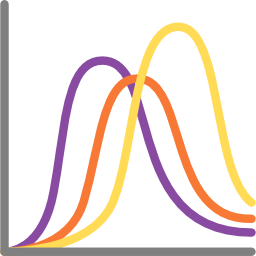

Estos algoritmos no emplean operadores de cruce ni mutación, ya que la población no se actualiza a partir de la incorporación de nuevos individuos, sino mediante la modificación de las distribuciones de probabilidad obtenidas.

En cada iteración del algoritmo se realizan las siguientes acciones:

1. Generar la población $P$ con distribución de probabilidad $D$.
2. Evaluar los individuos.
3. Seleccionar los mejores: $PS$.
4. Estimar la distribución de los mejores: $D^*$.
5. Repetir.

De forma iterativa, conseguimos que la distribución se concentre en torno a la solución óptima.

Veamos su implementación en **inspyred**:

In [ ]:
def ED(problem):
    ea = inspyred.ec.EDA(random.Random())
    ea.terminator = inspyred.ec.terminators.evaluation_termination
    final_pop = ea.evolve(evaluator=problem.evaluator, 
                          generator=problem.generator, 
                          pop_size=1000, 
                          bounder=problem.bounder,
                          maximize=problem.maximize,
                          max_evaluations=30000,
                          num_selected=500,
                          num_offspring=1000,
                          num_elites=1)
    best = max(final_pop) 
    print('Best Solution: \n{0}'.format(str(best)))

ED(problem_no_duplicates)
ED(problem_duplicates)

Best Solution: 
[1, 1, 1, 1, 0, 0, 0] : 22
Best Solution: 
[0, 0, 5, 0, 0, 0, 0] : 35


## 6. PAES

**_Pareto Archived Evolution Strategy_** (PAES) es un algoritmo de optimización multiobjetivo basado en búsqueda evolutiva y centrado en la generación de soluciones en un conjunto optimal de Pareto.

Los problemas de optimización multiobjetivo son aquellos donde se pretende encontrar una o más soluciones óptimas bajo una toma de decisiones multicriterio.

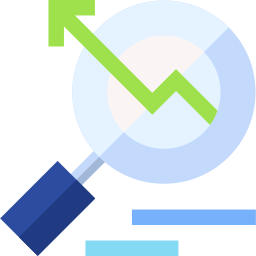

Se parte de una solución inicial, la cual es mutada para obtener una nueva solución candidata. Posteriormente, se evalúa dicha solución candidata y, en casa de dominar a la actual, la sustituye. Decimos que una solución domina a otra si es mejor o igual en todos los objetivos y, al menos, mejor en uno de ellos. Una solución es Pareto-optimal si no es dominada por ninguna otra solución del espacio.

El proceso seguido por PAES se resume en el siguiente diagrama (ver [[2]](https://ieeexplore.ieee.org/document/781913)):

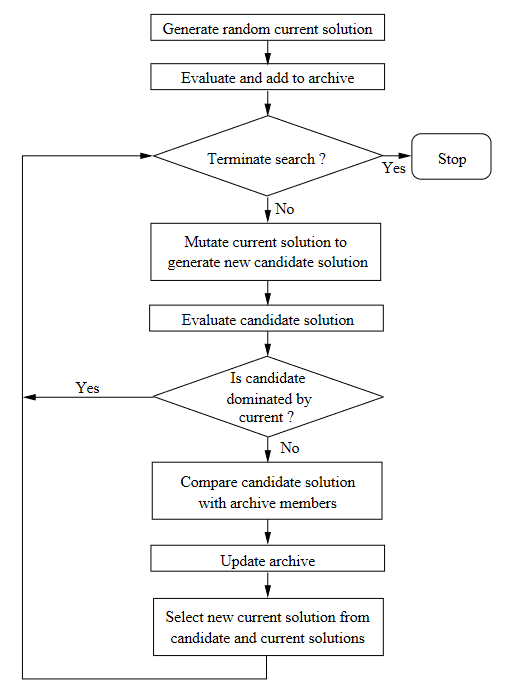

Finalmente, al tratarse de un problema multiobjetivo, emplearemos el *bencharmk* `Kursawe` para mostrar su implementación en **inspyred**:

In [ ]:
def PAES(problem):
  ea = inspyred.ec.emo.PAES(random.Random())
  ea.terminator = inspyred.ec.terminators.evaluation_termination
  final_pop = ea.evolve(generator=problem.generator, 
                        evaluator=problem.evaluator, 
                        bounder=problem.bounder,
                        maximize=problem.maximize,
                        max_evaluations=10000,
                        max_archive_size=50,
                        num_grid_divisions=4)

  final_arc = ea.archive
  print(final_arc)
  print('Best Solutions: \n')
  for f in final_arc:
      print(f)

PAES(inspyred.benchmarks.Kursawe(3))

[<Individual: candidate = [-1.244816292484095, -1.1176257693266218, -1.2894960629742362], fitness = [-14.264922374440479, -8.807782346475854], birthdate = 1623916857.604809>, <Individual: candidate = [-1.4440509999320328, 0.01036558077471228, -1.4251238211773618], fitness = [-15.01138769417009, -7.0282108076219085], birthdate = 1623916851.113919>, <Individual: candidate = [-1.2288910619343538, -0.8760651215947499, -1.361656776794485], fitness = [-14.628327372568123, -7.7692402293510225], birthdate = 1623916850.1958847>, <Individual: candidate = [-1.2703054892619123, -0.8059722856876077, -1.397615527185599], fitness = [-14.64376031488515, -7.654903834985051], birthdate = 1623916849.7309687>, <Individual: candidate = [-1.2703054892619123, 0.012571077272464315, -0.6738568887758676], fitness = [-16.495299537958275, -3.6020784677135795], birthdate = 1623916849.7506878>, <Individual: candidate = [-1.2703054892619123, 0.012571077272464315, -1.0491389567591065], fitness = [-15.863463974958467,

## 7. NSGA-II

**_Nondominated Sorting Genetic Algorithm_** (NSGA-II) es un método evolutivo, elitista y multiobjetivo que permite la preservación y evolución de soluciones Pareto-optimas. Está basado en la ordenación de la población empleando fronteras de no-dominancia.

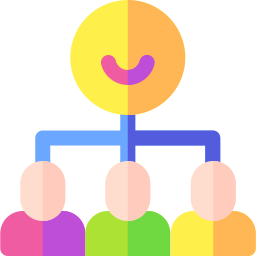

Este algoritmo parte de una población de padres $P_t$ aleatoria ordenada de acuerdo a sus niveles de no-dominancia (frentes de Pareto), los cuales quedan representados por una función *fitness*. A partir de esta población, se genera una población descendiente $Q_t$ mediante selección por torneo, cruce y mutación. Posteriormente, ambas poblaciones se combinan en una nueva población $R_t$ clasificada en diferentes frentes de Pareto. La nueva población es generada a partir de los frentes no dominados, siguiendo un proceso iterativo.

El proceso queda resumido en la siguiente figura (ver [[3]](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwinqsK4sJnxAhVSyhoKHXpODPgQFjAFegQIAxAD&url=https%3A%2F%2Fdialnet.unirioja.es%2Fdescarga%2Farticulo%2F4745489.pdf&usg=AOvVaw16vQ8gjGHVTWAHXHILXR1Z)):

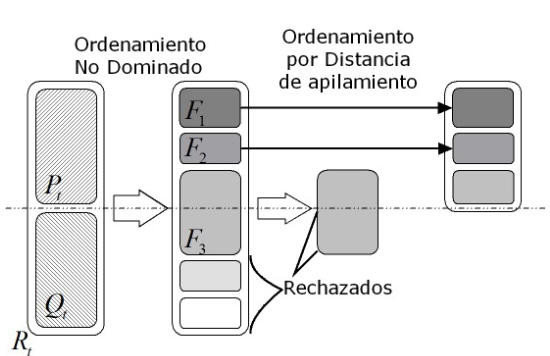

De nuevo, emplearemos `Kursawe` como *benchmark* para probar el funcionamiento de NSGA-II en **inspyred**:

In [ ]:
def NSGAII(problem):
  ea = inspyred.ec.emo.NSGA2(random.Random())
  ea.variator = [inspyred.ec.variators.blend_crossover, 
                  inspyred.ec.variators.gaussian_mutation]
  ea.terminator = inspyred.ec.terminators.generation_termination
  final_pop = ea.evolve(generator=problem.generator, 
                        evaluator=problem.evaluator, 
                        pop_size=20,
                        maximize=problem.maximize,
                        bounder=problem.bounder,
                        max_generations=80)


  final_arc = ea.archive
  print('Best Solutions: \n')
  for f in final_arc:
      print(f)

NSGAII(inspyred.benchmarks.Kursawe(3))

Best Solutions: 

[0.03947942332730709, -0.04396084469574216, -0.4436283836391109] : [-19.029512992833055, 0.283915911128971]
[0.0007068320502698067, -0.014885659234576062, -1.3292264228735238] : [-17.635688895282893, -3.283766743549409]
[-0.042617884593977716, -0.0010244347898882011, -1.2047885180912603] : [-17.7738500141987, -2.826306520698816]
[-0.006827500489158818, -0.02308027584038499, -1.4456360495468425] : [-17.44087114898635, -3.4731778320038647]
[0.004214192641159305, -0.013753763163648236, -1.2748935621769495] : [-17.720486503868035, -3.1165783472521458]
[-0.052108660271081964, 0.02959525263675844, -0.4573297272586939] : [-19.005040405819038, 0.25768984341338574]
[0.005654653866164463, -0.03224317462848499, -1.34697544144228] : [-17.57256799877548, -3.2861894033482857]
[-0.011096916710822802, -0.0332208595741654, -0.5910823527161432] : [-18.813573794991342, -0.11588395814543526]
[-0.9135189607518952, -0.04325410957556363, -1.049552927808563] : [-16.433566682295567, -3.691286

## 8. Enjambre de partículas

La optimización por **enjambre de partículas** (*Particle Swarm Optimization*) es una metaheurística basada en el comportamiento de las partículas en la naturaleza y la inteligencia de enjambre.

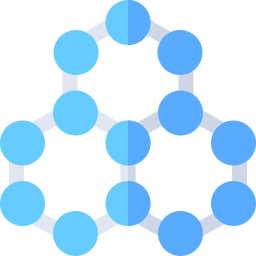

Este método permite optimizar un problema partiendo de un conjunto de soluciones candidatas (*partículas*) que se mueven por todo el espacio de búsqueda. El movimiento de las partículas dependerá de la mejor posición local encontrada por cada partícula, y por las mejores posiciones globales del resto del enjambre. 

La posición y la velocidad de las partículas determinarán cómo se produce el movimiento de las partículas por todo el espacio de búsqueda.

El hecho de considerar tanto óptimos locales como globales permite al enjambre aproximar mejor la solución óptima aunque, como toda metaheurística, esto no queda garantizado.

Finalmente, veamos su implementación en **inspyred**:

In [ ]:
def PSO(problem):
  ea = inspyred.swarm.PSO(random.Random())
  ea.terminator = inspyred.ec.terminators.evaluation_termination
  ea.topology = inspyred.swarm.topologies.ring_topology
  final_pop = ea.evolve(generator=problem.generator,
                        evaluator=problem.evaluator, 
                        pop_size=100,
                        bounder=problem.bounder,
                        maximize=problem.maximize,
                        max_evaluations=30000, 
                        neighborhood_size=5)

  best = max(final_pop) 
  print('Best Solution: \n{0}'.format(str(best)))

PSO(problem_no_duplicates)
PSO(problem_duplicates)

Best Solution: 
[1, 1, 1, 1, 0, 0, 0] : 22
Best Solution: 
[0, 0, 5, 0, 0, 0, 0] : 35


## 9. Colonia de hormigas

La optimización por **colonia de hormigas** (*Ant Colony Optimization*) es una metaheurística del tipo *inteligencia de enjambre* que permite la obtención del camino óptimo en un grafo basándose en el comportamiento de los hormigas a la hora de buscar y llevar alimento a la colonia.

Dicho comportamiento está basado en la liberación, seguimiento y evaporación de rastros de feromonas por parte de las hormigas.

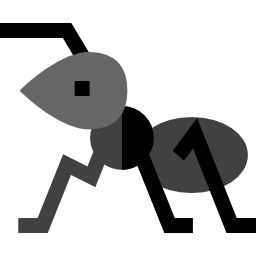

Básicamente, una hormiga sigue un camino aleatorio hasta encontrar un rastro de feromonas o alimento. En caso de encontrar un rastro existente, lo sigue y, si conduce a alimento, lo refuerza en el camino de vuelta a la colonia.

Por otro lado, los rastros de feromonas se evaporan con el tiempo, lo que evita la convergencia en óptimos locales.

Por tanto, encontrar un buen camino entre la colonia y el alimento da paso a que otras hormigas sigan el mismo camino. Así, la idea subyacente a este algoritmo es simular este comportamiendo en el contexto de un grafo que representa el problema a resolver.

Veamos su implementación en **inspyred**:

In [ ]:
def ACS(problem):
  ac = inspyred.swarm.ACS(random.Random(), problem.components)
  ac.terminator = inspyred.ec.terminators.generation_termination
  final_pop = ac.evolve(generator=problem.constructor, 
                            evaluator=problem.evaluator, 
                            bounder=problem.bounder,
                            maximize=problem.maximize, 
                            pop_size=10, 
                            max_generations=50)
      

  best = max(ac.archive)
  print('Best Solution:')
  print(best)

ACS(problem_no_duplicates)
ACS(problem_duplicates)

Best Solution:
[(1, 2), (3, 7), (2, 4), (7, 9)] : 22
Best Solution:
[(3, 7), (3, 7), (3, 7), (3, 7), (3, 7)] : 35


De esta forma, concluimos la descripción de los algoritmos bioinspirados presentes en **inspyred**.

## Conclusiones

* En este trabajo hemos estudiado el conjunto los algoritmos bioinspirados presentes en la librería **inspyred**, la cual proporciona una interfaz de alto nivel con algoritmos bioinspirados. 

* Se trata de una herramienta lo suficientemente completa y madura como para ser utilizada en los proyectos que impliquen problemas de optimización.

* Con este tutorial, pretendemos ofrecer una panorámica de su funcionamiento y posibilidades, dando pie al lector a profundizar en su uso, empleando los diferentes *benchmarks* y configuraciones que **inspyred** ofrece.
